In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [7]:
data_path = ('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
crime_df = pd.read_excel(data_path, header=1,
                         index_col=False, skiprows=[0, 1, 2], skipfooter=3)
crime_df.head(20)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,1781,3,0,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,nan,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,nan,0,12,18,405,99,291,15,0.000


In [12]:
crime_df.dtypes

City                    object
Population               int64
Violent crime            int64
Murder                   int64
Rape revised           float64
Rape legacy              int64
Robbery                  int64
Aggravated assault       int64
Property crime           int64
Burglary                 int64
Larceny                  int64
Motor vehicle theft      int64
Arson                  float64
dtype: object

In [14]:
crime_df.columns=['City','Population', 'Violent crime', 'Murder', 'Rape revised', 'Rape legacy', 'Robbery', 
         'Aggravated assault','Property crime', 'Burglary', 'Larceny', 'Motor vehicle theft', 'Arson']
crime_df.head(20)

,City,Population,Violent crime,Murder,Rape revised,Rape legacy,Robbery,Aggravated assault,Property crime,Burglary,Larceny,Motor vehicle theft,Arson
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,1781,3,0,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,nan,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,nan,0,12,18,405,99,291,15,0.000


In [28]:
#Create a new dataframe with the variables we want
data_df = crime_df[['City', 'Population', 'Murder', 'Robbery']].copy()

#Add a population squared column
data_df['Population Squared'] = crime_df['Population'] ** 2

#Create binary data for robbery and murder
data_df['Robbery_Binary'] = data_df['Robbery'].apply(lambda x: 1 if x > 0 else 0)
data_df['Murder_Binary'] = data_df['Murder'].apply(lambda x: 1 if x > 0 else 0)

data_df.head(20)

,City,Population,Murder,Robbery,Population Squared,Robbery_Binary,Murder_Binary
0,Adams Village,1861,0,0,3463321,0,0
1,Addison Town and Village,2577,0,0,6640929,0,0
2,Akron Village,2846,0,0,8099716,0,0
3,Albany,97956,8,227,9595377936,1,1
4,Albion Village,6388,0,4,40806544,1,0
5,Alfred Village,4089,0,3,16719921,1,0
6,Allegany Village,1781,0,0,3171961,0,0
7,Amherst Town,118296,1,31,13993943616,1,1
8,Amityville Village,9519,0,4,90611361,1,0
9,Amsterdam,18182,0,12,330585124,1,0


In [29]:
#Double Check there is no missing data

def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(data_df.apply(num_missing, axis=0))

Missing values per column:
City                  0
Population            0
Murder                0
Robbery               0
Population Squared    0
Robbery_Binary        0
Murder_Binary         0
dtype: int64


                    Population Squared  Robbery_Binary  Murder_Binary
Population Squared               1.000           0.044          0.133
Robbery_Binary                   0.044           1.000          0.313
Murder_Binary                    0.133           0.313          1.000


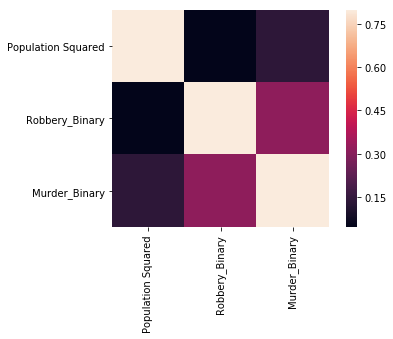

In [34]:
#Check for colinearity
import seaborn as sns
plotdf = data_df.loc[:, ['City', 'Population Squared', 'Robbery_Binary', 'Murder_Binary']]            
corrmat = plotdf.corr()
print(corrmat)
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
#Looks like none of the variables demonstrate strong colinearity